In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
df = pd.read_csv('transaction_data.csv')

In [19]:
df.head(10)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
9,2020-03-02 00:47:06,Olga_Petrova,successfull


In [8]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [10]:
df.shape

(5315, 3)

In [12]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [18]:
df.isna().sum()
#  проверяем количество пропущенные значений по каждому из столбцов

date           0
name           0
transaction    0
dtype: int64

In [21]:
# Проверьте, какие значения принимает колонка transaction . 
# Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

# Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [26]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [29]:
df.transaction

0         cancelled
1       successfull
2       successfull
3         cancelled
4         cancelled
           ...     
5310    successfull
5311    successfull
5312    successfull
5313    successfull
5314      cancelled
Name: transaction, Length: 5315, dtype: object

In [41]:
counts = df.transaction.value_counts().sort_values()
counts

error             4
cancelled      1619
successfull    3692
Name: transaction, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


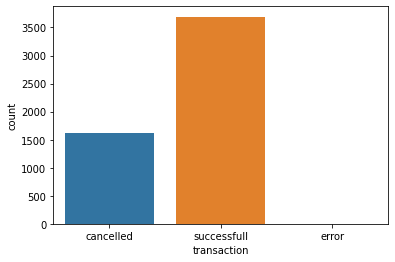

In [43]:
sns.countplot(df.transaction)

In [56]:
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

# Посмотрите на характеристики распределения, а затем постройте гистограмму 
# числа успешных транзакций, совершённых каждым пользователем, где

# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

In [75]:
Table = df \
    .query("transaction == 'successfull'") \
    .groupby('name', as_index = False) \
    .agg({'date': 'count'}) \
    .rename(columns = {'date': 'counts'}) \
    .sort_values('counts', ascending = False)
Table

,name,counts
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


In [73]:
Table.dtypes

name      object
counts     int64
dtype: object

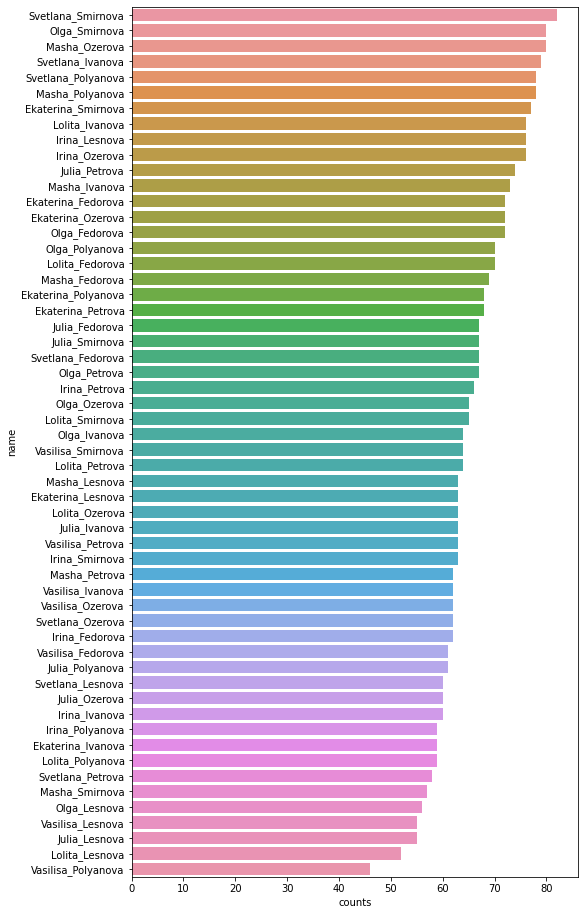

In [76]:
plt.figure(figsize=(8, 16))
sns.barplot(x='counts', y='name', data=Table)

In [78]:
Table.describe()

,counts
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [96]:
df_upd = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])
df_upd

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [ ]:
# К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.

# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

In [107]:
user_vs_minute_pivot = df_upd.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction': 'count'}) \
    .rename(columns = {'transaction': 'transactions_count'}) \
    .pivot(index='minute', columns='name', values='transactions_count') \
    .fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [111]:
df_upd['true_minute'] = df_upd['date'].dt.minute + df_upd['date'].dt.hour * 60
df_upd

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [121]:
trans_minute = df_upd.groupby('minute', as_index=False) \
    .agg({'transaction': 'count'}) 
trans_minute.head()

,minute,transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92


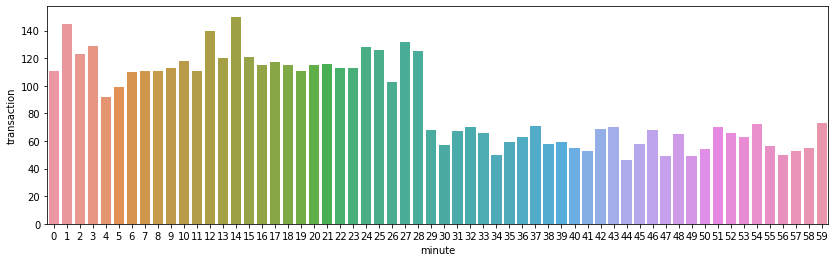

In [122]:
plt.figure(figsize=(14, 4))
sns.barplot(x='minute', y='transaction', data=trans_minute)